## Computer vision 2022 Assignment 3: Deep Learning for Perception Tasks

This assignment contains 2 questions. The first question gives you a basic understanding of the classifier. The second question requires you to write a simple proposal.

# Question 1: A simple classifier (60%)

For this exercise, we will provide a demo code showing how to train a network on a small dataset called FashionMinst. Please go through the following tutorials first. You will get a basic understanding about how to train an image classification network in pytorch. You can change the training scheme and the network structure. Please answer the following questions then. You can orginaze your own text and code cell to show the answer of each questions.


Note: Please plot the loss curve for each experiment (2 point).


Requirement:

Q1.1 (1 point) Change the learning rate and train for 10 epochs. Fill this table:

|Lr| Accuracy |
|---|----------|
|1   | 10%       |
|0.1| 87.6%    |
|0.01| 83.3%    |
|0.001  | 71.6%    |


Q1.2 (2 point) Report the number of epochs when the network is converged.
Hint: The network is called "converged" when the accuracy is not changed (or the change is smaller than a threshold).

|Lr| Accuracy | Epoch |
|---|----------|-------|
|1   | 10%      | 56     |
|0.1| 89.8%    | 164   |
|0.01| 89.3%    | 398   |
|0.001  | 88.9%    | 642   |


Q1.3 (2 points) Compare the results in table 1 and table 2, what is your observation and your understanding of learning rate?

I performed a total of three model training sessions, with a learning rate of 0.01 chosen, all with 1000 training sessions. The base set was generally very stable with a parameter count of 669,706, and accuracy generally continued to increase, reaching 89.3% over 1000 training sessions, with the loss value starting to increase after about eighty training sessions. Without changing the width, I deepened one linear layer and one activation layer to give more depth to the model. At the beginning of the training, the accuracy would be lower than the base and width groups, and he reached 89.3% accuracy when training reached 384 times, and 89.5% at 1000 times. With 932,362 parameters, it took him less time to reach 89.2% accuracy than in the base group, but his loss values also rose more quickly. In the wider group, with 1333770 parameters, I changed the size from 512 to 1024 and increased his width. In the first training session, the accuracy rate was 72.5%, and by the time we reached 256 sessions, the accuracy rate was 89.3%, and the rate of increase in loss was much slower than in the other two groups. The highest value was 89.7%. By looking at the number of parameters in the three groups, we can see that the more parameters, the better the training, but at the same time, the instability increases and the possibility of overfitting is greater.

Q1.4 (3 point) Build a deeper/ wider network. Report the accuracy and the parameters for each structure. Parameters represent the number of trainable parameters in your model, e.g. a 3 x 3 conv has 9 parameters.

|Structures| Accuracy | Parameters |
|---|----------|------------|
|Base   | 89.2%    | 669706     |
|Deeper| 89.2%    | 932362    |
|Wider| 89.3%    | 1333770         |


Q1.5 (2 points) Choose to do one of the following two tasks:

a. Write a code to calculate the parameter and expian the code.

The torchsummary library provides us with a visual method of summary, so I call this method

OR

b. Write done the process of how to calculate the parameters by hand. 


Q1.6 (1 points) What are your observations and conclusions for changing network structure?

I ran the model training three times in total, all 1000 times. The training of the base group is generally very stable, and the accuracy rate generally continues to rise, reaching 89.2% in 1000 training sessions. Without changing the width, I deepened a linear layer and an activation layer to make the model deeper. At the beginning of training, the accuracy rate will be lower than that of base and wider, and when the training reaches 664 times , his accuracy reached 89.2%, but it dropped to 88.6% at 1000 times. Compared with the base group, it took less time for his accuracy to reach 89.2%, but it did not continue to increase after that, which shows that It is already in a state of overfitting and the loss value keeps rising. In the wider group, I changed the size from 512 to 1024 and increased his width. In the first training, the accuracy rate reached 55.3%, and when the training reached 788 times, the accuracy rate reached the third group. The highest value was 89.3%, and then dropped to 89.2%. By observing the number of parameters in the three groups, we can find that the more parameters, the better the training effect, but at the same time, the unstable factors will also increase, and there is a greater possibility of overfitting.

Q1.7 (2 points) Calculate the mean of the gradients of the loss to all trainable parameters. Plot the gradients curve for the first 100 training steps. What are your observations? Note that this gradients will be saved with the training weight automatically after you call loss.backwards(). Hint: the mean of the gradients should be decreased.

For more exlanation of q1.7, you could refer to the following simple instructions: https://colab.research.google.com/drive/1XAsyNegGSvMf3_B6MrsXht7-fHqtJ7OW?usp=sharing

In [6]:
import numpy as np  # This is for mathematical operations

# this is used in plotting 
import matplotlib.pyplot as plt
import time
import pylab as pl
from IPython import display
from torchinfo import summary

% matplotlib inline

% load_ext autoreload
% autoreload 2
% reload_ext autoreload

UsageError: Line magic function `%` not found.


In [7]:
def plot_graph(epoch,array1,array2):

    count_array = range(1,epoch+1,1)

    print(count_array)

    plt.xlabel("epochs",fontsize=20)
    plt.ylabel("accuracy / loss",fontsize=20)
    plt.plot(count_array,array1)
    plt.plot(count_array,array2,color="red")

    plt.show()

In [8]:
#### Tutorial Code
####PyTorch has two primitives to work with data: torch.utils.data.DataLoader and torch.utils.data.Dataset. 
#####Dataset stores samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset.
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose

# Download training data from open datasets. 
##Every TorchVision Dataset includes two arguments: 
##transform and target_transform to modify the samples and labels respectively.


training_data = datasets.FashionMNIST (
        # 下载的根目录为data
        root="data",
        # 设为训练集
        train=True,
        download=True,
        # 自动打包为tensor
        transform=ToTensor (),
        )

# Download test data from open datasets.
test_data = datasets.FashionMNIST (
        # 下载的根目录为data
        root="data",
        # 设为测试集
        train=False,
        download=True,
        # 自动打包为tensor
        transform=ToTensor (),
        )

We pass the Dataset as an argument to DataLoader. This wraps an iterable over our dataset and supports automatic batching, sampling, shuffling, and multiprocess data loading. Here we define a batch size of 64, i.e. each element in the dataloader iterable will return a batch of 64 features and labels.

In [ ]:
batch_size = 64
# 封装数据，一个封装包的大小为64

# Create data loaders.
train_dataloader = DataLoader (training_data, batch_size=batch_size)
test_dataloader = DataLoader (test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print ("Shape of X [N, C, H, W]: ", X.shape)
    print ("Shape of y: ", y.shape, y.dtype)
    break

To define a neural network in PyTorch, we create a class that inherits from nn.Module. We define the layers of the network in the init function and specify how data will pass through the network in the forward function. To accelerate operations in the neural network, we move it to the GPU if available.

In [ ]:
# 使用GPU训练
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available () else "cpu"
print ("Using {} device".format (device))


# 定义训练模型
# Define model
class NeuralNetwork (nn.Module):
    # 定义卷积神经网络
    def __init__ (self):
        # 调用父类构造函数
        super (NeuralNetwork, self).__init__ ()
        # 将 张量 改为 一维向量 1 * with * height -> 1 * (with*height)
        self.flatten = nn.Flatten ()

        # base
        self.linear_relu_stack = nn.Sequential (
                #      输入样本size  输出样本的size
                nn.Linear (28 * 28, 512),
                # 激活函数
                nn.ReLU (),
                nn.Linear (512, 512),
                nn.ReLU (),
                # 最后的输出为 N * 10 的矩阵
                nn.Linear (512, 10)
                )

        # deeper
        # self.linear_relu_stack = nn.Sequential (
        #         #      输入样本size  输出样本的size
        #         nn.Linear (28 * 28, 512),
        #         # 激活函数
        #         nn.ReLU (),
        #         nn.Linear (512, 512),
        #         nn.ReLU (),
        #         nn.Linear (512, 512),
        #         nn.ReLU (),
        #         # 最后的输出为 N * 10 的矩阵
        #         nn.Linear (512, 10)
        #         )

        # wider
        # self.linear_relu_stack = nn.Sequential (
        #         #      输入样本size  输出样本的size
        #         nn.Linear (28 * 28, 1024),
        #         # 激活函数
        #         nn.ReLU (),
        #         nn.Linear (1024, 512),
        #         nn.ReLU (),
        #         # 最后的输出为 N * 10 的矩阵
        #         nn.Linear (512, 10)
        #         )

        # self.linear_relu_stack = nn.Sequential (
        #         #      输入样本size  输出样本的size
        #         nn.Linear (28 * 28, 1024),
        #         # 激活函数
        #         nn.ReLU (),
        #         nn.Linear (1024, 512),
        #         nn.ReLU (),
        #         nn.Linear (512, 256),
        #         nn.ReLU (),
        #         # 最后的输出为 N * 10 的矩阵
        #         nn.Linear (256, 10)
        #         )

    # 前馈
    def forward (self, x):
        x = self.flatten (x)
        logits = self.linear_relu_stack (x)
        return logits


# 创建网络 并放入GPU
model = NeuralNetwork ().to (device)
print (model)

In [11]:
def model_structure(model):
    blank = ' '
    num_para = 0
    type_size = 1  ##如果是浮点数就是4

    for index, (key, w_variable) in enumerate(model.named_parameters()):
        if len(key) <= 30:
            key = key + (30-len(key)) * blank
        shape = str(w_variable.shape)
        if len(shape) <= 40:
            shape = shape + (40-len(shape)) * blank
        each_para = 1
        for k in w_variable.shape:
            each_para *= k
        num_para += each_para
        str_num = str(each_para)
        if len(str_num) <= 10:
            str_num = str_num + (10-len(str_num)) * blank
    print('The total number of parameters: ' + str(num_para))
    print('The parameters of Model {}: {:4f}M'.format(model._get_name(), num_para * type_size / 1000 / 1000))

In [ ]:
print('Q1.5')
model_structure(model)

In [13]:
summary (model, input_size=(batch_size, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
NeuralNetwork                            --                        --
├─Flatten: 1-1                           [64, 784]                 --
├─Sequential: 1-2                        [64, 10]                  --
│    └─Linear: 2-1                       [64, 512]                 401,920
│    └─ReLU: 2-2                         [64, 512]                 --
│    └─Linear: 2-3                       [64, 512]                 262,656
│    └─ReLU: 2-4                         [64, 512]                 --
│    └─Linear: 2-5                       [64, 10]                  5,130
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
Total mult-adds (M): 42.86
Input size (MB): 0.20
Forward/backward pass size (MB): 0.53
Params size (MB): 2.68
Estimated Total Size (MB): 3.41

In [17]:
# 定义损失函数与优化器
###Define the loss function and the optimizer
# 交叉熵损失函数
loss_fn = nn.CrossEntropyLoss ()
#                 优化器      权重                  学习率
#                                  获取模型的参数
optimizer = torch.optim.SGD (model.parameters (), lr=1)

In [18]:
loss_grad = []

In [19]:
accuracy = []

In [20]:
loss = []

In a single training loop, the model makes predictions on the training dataset (fed to it in batches), and backpropagates the prediction error to adjust the model’s parameters.

In [21]:
# 训练
def train (dataloader, model, loss_fn, optimizer):
    size = len (dataloader.dataset)
    # 将模型切换至训练模式
    model.train ()

    # 临时
    count = 0
    total = 0

    # 构建计算图时使用张量tensor []
    for batch, (X, y) in enumerate (dataloader):

        # 训练时，输入 训练数据，标签
        # 放入GPU中训练
        X, y = X.to (device), y.to (device)

        # Compute prediction error
        # 计算损失值
        # 预测值 (前馈)
        pred = model (X)
        #              预测值  实际值
        loss = loss_fn (pred, y)

        # Backpropagation
        # 反向传播
        # 将梯度初始化为零(如果不清0将保持上一次的grad，会对结果造成影响)
        # (根据训练计划而定，特定情况下不用清零)
        optimizer.zero_grad ()

        # 临时
        total += loss.cpu().item()
        count += 1

        # 反向传播计算得到的每个参数的梯度值 (反馈)
        loss.backward ()

        # 通过梯度下降执行一次参数的更新 (更新 )
        optimizer.step ()

        if batch % 100 == 0:
            # 更新 参数的时候使用 标量 ，否则会对计算图造成影响(内存消耗)
            #                    python语法，item()获取 标量
            loss, current = loss.item (), batch * len (X)
            print (f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    # 临时
    loss_grad.append(total/count)

In [22]:
##Define a test function
def test (dataloader, model, loss_fn):
    size = len (dataloader.dataset)
    num_batches = len (dataloader)
    # 将模型切换为评估模式
    # 关闭 batchnormalization和dropout，防止在预测时影响预测结果
    model.eval ()
    test_loss, correct = 0, 0
    # 将requires_grad统一设为false，在方向传播时候，梯度将不会自动求导
    with torch.no_grad ():
        for X, y in dataloader:
            X, y = X.to (device), y.to (device)
            # 获取预测值
            pred = model (X)
            # 获取差                        这里使用标量
            test_loss += loss_fn (pred, y).item ()
            # 统计正确的
            #        返回预测矩阵中的最大值 == y
            correct += (pred.argmax (1) == y).type (torch.float).sum ().item ()
    # 计算损失值
    test_loss /= num_batches
    loss.append(test_loss)
    # 计算正确率
    correct /= size
    accuracy.append(correct)
    print (f"Test Error: \n Accuracy: {(100 * correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
epochs = 100
accuracy.clear()
loss.clear()
for t in range (epochs):
    print (f"Epoch {t + 1}\n-------------------------------")
    train (train_dataloader, model, loss_fn, optimizer)
    test (test_dataloader, model, loss_fn)
    print ("Done!")

1
range(1, 11)


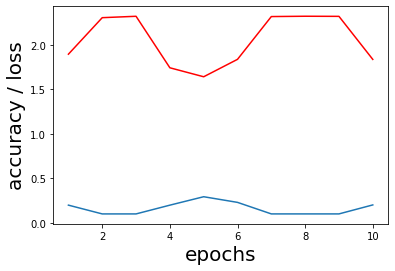

In [22]:
print("1")
plot_graph(epochs,accuracy,loss)

0.1
range(1, 11)


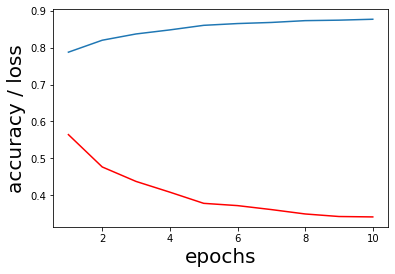

In [36]:
print("0.1")
plot_graph(epochs,accuracy,loss)

0.01
range(1, 11)


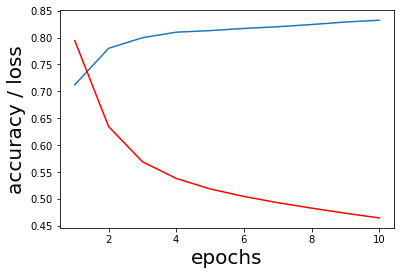

In [54]:
print("0.01")
plot_graph(epochs,accuracy,loss)

0.001
range(1, 11)


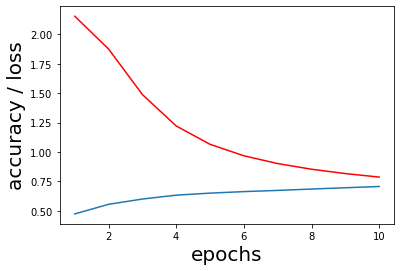

In [78]:
print("0.001")
plot_graph(epochs,accuracy,loss)

In [35]:
print("base:")

base:


range(1, 1001)


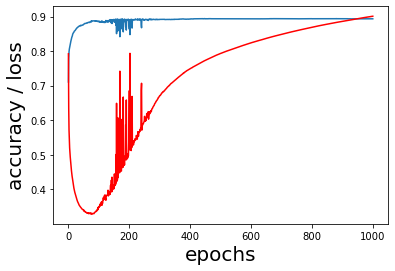

In [29]:
plot_graph(epochs,accuracy,loss)

In [ ]:
#1.4 wider
epochs = 1000
for t in range (epochs):
    print (f"Epoch {t + 1}\n-------------------------------")
    train (train_dataloader, model, loss_fn, optimizer)
    test (test_dataloader, model, loss_fn)
    print ("Done!")

In [48]:
print("wider:")

wider:


range(1, 1001)


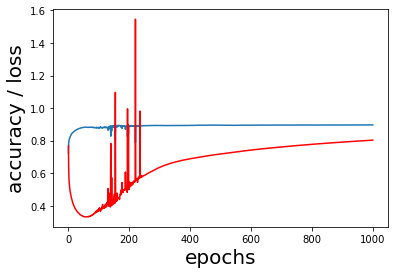

In [95]:
plot_graph(epochs,accuracy,loss)

In [ ]:
#1.4 deeper
epochs = 1000
for t in range (epochs):
    print (f"Epoch {t + 1}\n-------------------------------")
    train (train_dataloader, model, loss_fn, optimizer)
    test (test_dataloader, model, loss_fn)
    print ("Done!")

In [49]:
print("deeper:")

deeper:


range(1, 1001)


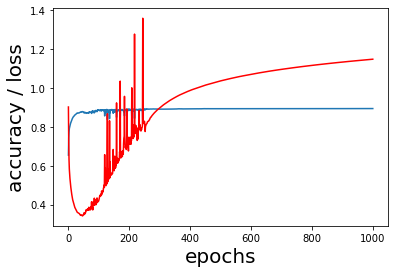

In [47]:
plot_graph(epochs,accuracy,loss)

In [ ]:
# deeper and wider
epochs = 1000
accuracy.clear()
loss.clear()
for t in range (epochs):
    print (f"Epoch {t + 1}\n-------------------------------")
    train (train_dataloader, model, loss_fn, optimizer)
    test (test_dataloader, model, loss_fn)
    print ("Done!")

In [79]:
print("deeper and wider:")

deeper and wider:


range(1, 1001)


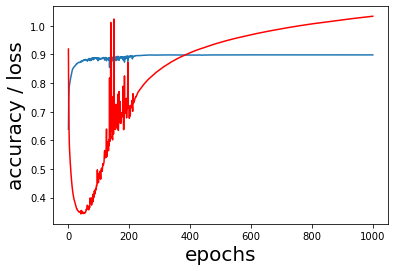

In [18]:
plot_graph(epochs,accuracy,loss)

In [ ]:
#Train and test the model
# 0.001
epochs = 1000
accuracy.clear()
loss.clear()
for t in range (epochs):
    print (f"Epoch {t + 1}\n-------------------------------")
    train (train_dataloader, model, loss_fn, optimizer)
    test (test_dataloader, model, loss_fn)
    print ("Done!")

In [51]:
print("0.001:")

0.001:


range(1, 1001)


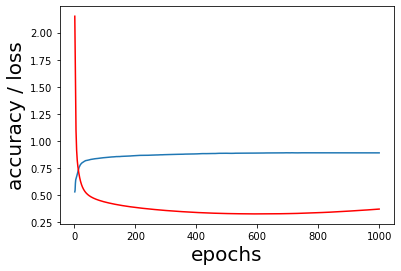

In [31]:
plot_graph(epochs,accuracy,loss)

In [ ]:
#0.1:
epochs = 200
accuracy.clear()
loss.clear()
for t in range (epochs):
    print (f"Epoch {t + 1}\n-------------------------------")
    train (train_dataloader, model, loss_fn, optimizer)
    test (test_dataloader, model, loss_fn)
    print ("Done!")

In [24]:
print("0.1:")

0.1:


range(1, 201)


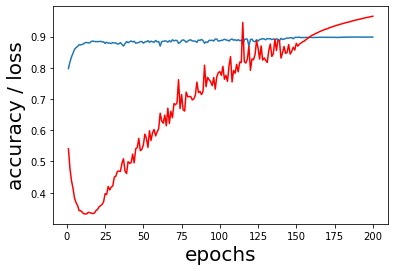

In [16]:
plot_graph(epochs,accuracy,loss)

1
range(1, 101)


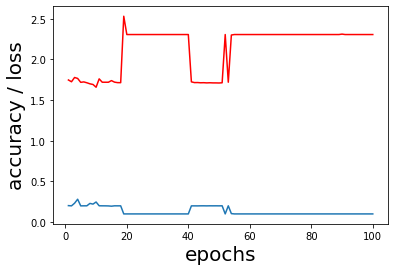

In [25]:
print("1")
plot_graph(epochs,accuracy,loss)

In [ ]:
#Q1.7
epochs = 100
for t in range (epochs):
    print (f"Epoch {t + 1}\n-------------------------------")
    train (train_dataloader, model, loss_fn, optimizer)
    test (test_dataloader, model, loss_fn)
    print ("Done!")

In [53]:
print("1.7:")

1.7:


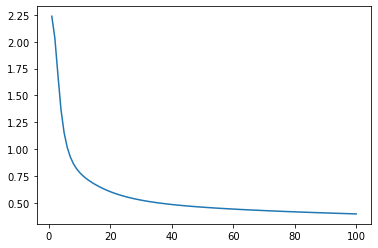

In [15]:
x = range(1,101,1)
plt.plot(x,loss_grad)

# Question 2: Proposal for Practical Applications (40%)
Look for a typical computer vision problem, such as:
a. removing noise on the image

b. increasing the resolution of the image

c. identifying objects in the image

d. segmenting the area to which the image belongs

e. estimating the depth of an object

f. estimating the motion of two object in different frames

h. others

Discuss possible applications of this problem in life, e.g. image editing systems in your phone, improved quality of the old film, sweeping robot avoiding obstacles, unlocks the face of the mobile phone, identifies the cancer area according to the medical scan image, determines the identity according to the face, identifies the trash can on the road, and the detection system tracks the target object, etc.

In this question, you need to do
1. Clearly define the problem and describe its application scenarios
2. Briefly describe a feasible solution based on image processing and traditional machine learning algorithms.
3. Briefly describe a feasible deep learning-based solution.
4. Compare the advantages and disadvantages of the two options.

Hint1: Submit an individua report for question 2.

Hint2: Well orginaze your report.

Hint3: You can draw flow chart or inculde other figures for better understanding of your solution.  

Please restrict your report within 800 words. In this question, you do not need to implement your solution. You only need to write down a proposal. Please submit this report in a seperate pdf. 
